In [1]:
import numpy as np
from matplotlib import pyplot as plt

from pyloki.config import ParamLimits, PulsarSearchConfig
from pyloki.detection import thresholding
from pyloki.ffa import DynamicProgramming
from pyloki.pattern import generate_branching_pattern_circular
from pyloki.periodogram import PruningStatsPlotter, ScatteredPeriodogram
from pyloki.prune import prune_dyp_tree
from pyloki.simulation.pulse import PulseSignalConfig
from pyloki.utils.misc import C_VAL


tobs = 1073.741824


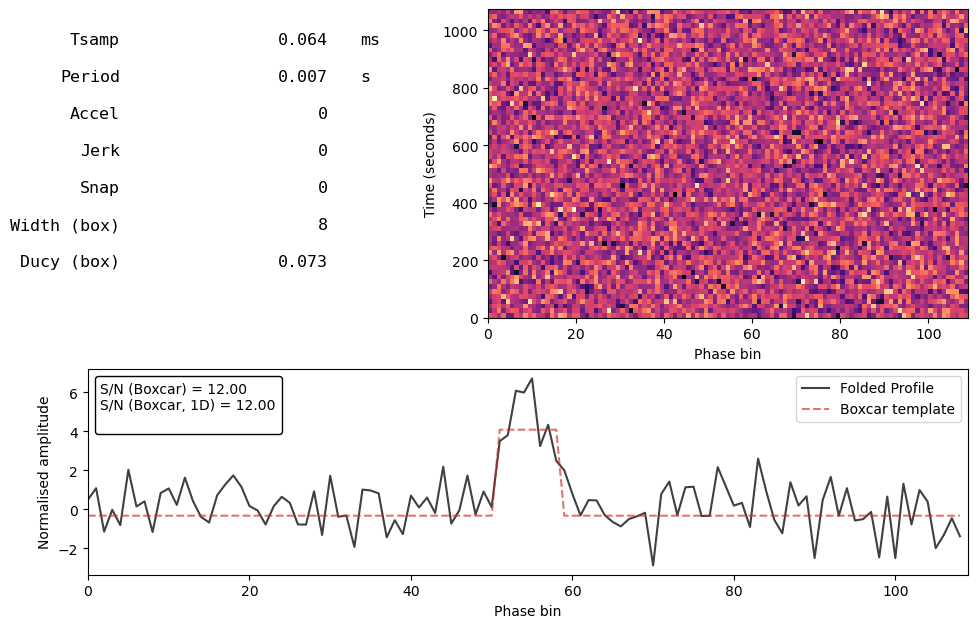

In [2]:
pulsar_period = 0.007
dt = 64e-6
nsamps = 2**24
mod_kwargs = {"p_orb": 1200, "psi": np.pi/4.1, "m_c": 8}
cfg = PulseSignalConfig(period=pulsar_period, dt=dt, nsamps=nsamps, snr=12, ducy=0.1,
                        mod_kwargs=mod_kwargs, mod_type = "circular")
print(f"tobs = {cfg.tobs}")
tim_data = cfg.generate(shape="gaussian")
tim_data.plot_fold(cfg.freq, cfg.fold_bins, mod_kwargs=mod_kwargs, mod_type = "circular")
plt.show()

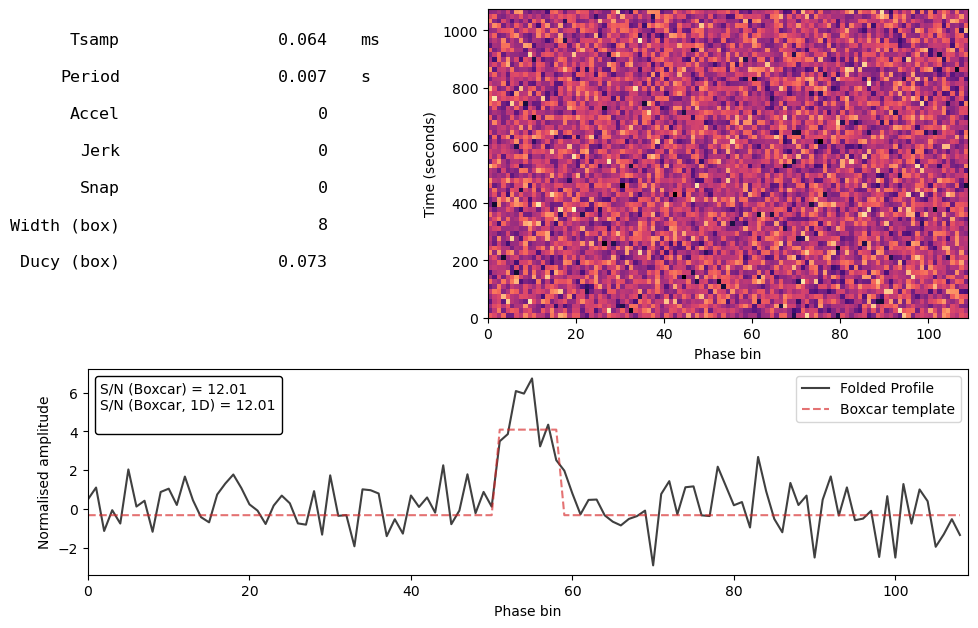

In [3]:
tim_data.plot_fold(cfg.freq, cfg.fold_bins, mod_kwargs=cfg.mod_func.to_derivatives_series(n=15), mod_type="derivative_series")
plt.show()

In [4]:
tol_bins = 1 #cfg.tol_bins
fold_bins = 64 #cfg.fold_bins
p_orb_min = 1100
p = ParamLimits.from_circular(1 / 0.007, p_orb_min, 12, m_p=1.4, poly_order=5)
print(p.limits)
bseg_brute = cfg.nsamps // 8192
bseg_ffa = cfg.nsamps // 128
search_cfg = PulsarSearchConfig(nsamps=cfg.nsamps, tsamp=cfg.dt, nbins=fold_bins, tol_bins=tol_bins, param_limits=p.limits,
                                bseg_brute=bseg_brute, bseg_ffa=bseg_ffa, prune_poly_order=5, ducy_max=0.2, wtsp=1.1, use_fft_shifts=True, branch_max=128,
                                p_orb_min=p_orb_min)
dyp = DynamicProgramming(tim_data, search_cfg)
dyp.initialize()
dyp.execute()

[(np.float64(-0.0020658548012591053), np.float64(0.0020658548012591053)), (np.float64(-0.36167010366356284), np.float64(0.36167010366356284)), (np.float64(-63.31774324327566), np.float64(63.31774324327566)), (np.float64(-11085.065004849856), np.float64(11085.065004849856)), (np.float64(141.93237586907134), np.float64(143.7819098452144))]


2025-09-20 15:20:57 INFO     - pyloki.ffa - FFA initialize: Grid sizes: [5.17413858e+13 3.39092346e+11             
                             2.77784450e+09 3.03414695e+07                                                         
                              2.38418579e-01]

2025-09-20 15:20:58 INFO     - pyloki.ffa - ffa level:  0, leaves: 2.81, fold dims: (8192, 1, 1, 1, 1, 7, 2, 33)

                    INFO     - pyloki.ffa - ffa_initialize finished, Elapsed time: 0.250 seconds

Output()

2025-09-20 15:21:01 INFO     - pyloki.ffa - ffa level:  1, leaves:  3.91, fold dims: (4096, 1, 1, 1, 1, 15, 2, 33)

                    INFO     - pyloki.ffa - ffa level:  2, leaves:  4.95, fold dims: (2048, 1, 1, 1, 1, 31, 2, 33)

                    INFO     - pyloki.ffa - ffa level:  3, leaves:  5.95, fold dims: (1024, 1, 1, 1, 1, 62, 2, 33)

                    INFO     - pyloki.ffa - ffa level:  5, leaves:  7.95, fold dims: (256, 1, 1, 1, 1, 248, 2, 33)

                    INFO     - pyloki.ffa - ffa level:  6, leaves:  9.95, fold dims: (128, 1, 1, 1, 2, 496, 2, 33)

                    INFO     - pyloki.ffa - FFA complete: Grid sizes: [4.81879207e+04 2.02114788e+04 1.05966358e+04
                             7.40758533e+03                                                                        
                              3.72529030e-03]

                    INFO     - pyloki.ffa - ffa_execute finished, Elapsed time: 3.161 seconds

In [5]:
branching_pattern = generate_branching_pattern_circular(dyp.param_arr, dyp.dparams_limited, dyp.cfg.param_limits, dyp.cfg.tseg_ffa, dyp.nsegments,
                                                        dyp.cfg.nbins, dyp.cfg.tol_bins, 0, kind="taylor")
branching_pattern

array([8.        , 3.        , 2.        , 3.        , 3.        ,
       1.        , 6.        , 3.        , 1.        , 1.        ,
       3.        , 1.        , 1.        , 3.        , 3.        ,
       3.        , 1.        , 1.        , 1.        , 3.        ,
       1.        , 1.        , 3.        , 1.        , 3.        ,
       3.        , 1.        , 1.        , 1.        , 1.        ,
       2.        , 1.        , 1.        , 3.        , 3.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 3.        , 1.        ,
       3.        , 1.        , 1.        , 3.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 3.        ,
       1.        , 1.        , 2.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       3.        , 1.        , 1.        , 1.        , 1.     

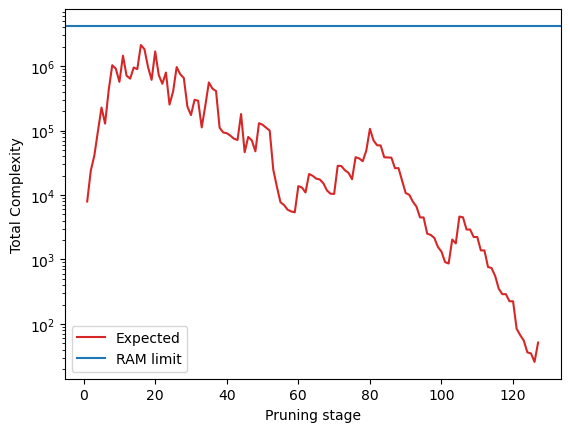

Branching Pattern: [8.0,3.0,2.0,3.0,3.0,1.0,6.0,3.0,1.0,1.0,3.0,1.0,1.0,3.0,3.0,3.0,1.0,1.0,
 1.0,3.0,1.0,1.0,3.0,1.0,3.0,3.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,3.0,3.0,1.0,
 1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,3.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,
 1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,
 1.0,1.0,1.0,3.0,1.0,1.0,1.8,2.2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,
 1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,3.0,1.0,1.0,1.0,
 1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,
 2.0]

Thresholds: [1.2,1.7,2.2,2.4,2.5,2.8,3.0,2.9,2.8,3.1,3.0,3.4,3.2,3.6,4.0,3.9,3.8,4.1,
 4.2,4.0,4.4,4.4,4.6,4.9,5.0,4.9,4.9,4.8,5.2,5.2,5.1,4.9,5.4,5.4,5.4,5.4,
 5.3,5.8,5.7,5.5,5.5,5.5,5.4,5.5,6.0,6.1,6.0,6.1,6.0,5.9,5.9,5.9,6.4,6.5,
 6.6,6.5,6.5,6.4,6.3,6.4,6.3,6.4,6.3,6.3,6.3,6.2,6.3,6.4,6.4,6.2,6.3,6.1,
 6.3,6.3,6.4,6.5,6.4,6.4,6.5,6.2,6.6,6.6,6.4,6.7,6.5,6.4,6.7,6.3,6.8,6.9,
 6.8,6.9,6.9,7.0,6.6,7.1,7.0,7.0,7.1,7.1,7.2,7.1,7.2,7.2,7.2,7.1,7.3,6.9,
 7.3,6.9,7.4,7.0,7.5,7.4,7.5,7.6,7.6,7.2,7.6,7.3,7.8,7.8,7.8,7.9,7.8,7.9,
 7.5]

         Scheme Metrics Summary         
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃ Metric                       ┃ Value ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│ Branching mean               │  1.29 │
│ Branching max                │  8.00 │
│ Total enumerated options     │ 46.44 │
│ Pruning complexity           │ 15.24 │
│ Crude survival probability   │  0.35 │
│ Total cost                   │ 16.76 │
│ Number of independent trials │ 16.93 │
│ Total survival probability   │  1.00 │
└──────────────────────────────┴───────┘

In [6]:
thresholds = np.array([1.2, 1.7, 2.2, 2.4, 2.5, 2.8, 3. , 2.9, 2.8, 3.1, 3. , 3.4, 3.2,
       3.6, 4. , 3.9, 3.8, 4.1, 4.2, 4. , 4.4, 4.4, 4.6, 4.9, 5. , 4.9,
       4.9, 4.8, 5.2, 5.2, 5.1, 4.9, 5.4, 5.4, 5.4, 5.4, 5.3, 5.8, 5.7,
       5.5, 5.5, 5.5, 5.4, 5.5, 6. , 6.1, 6. , 6.1, 6. , 5.9, 5.9, 5.9,
       6.4, 6.5, 6.6, 6.5, 6.5, 6.4, 6.3, 6.4, 6.3, 6.4, 6.3, 6.3, 6.3,
       6.2, 6.3, 6.4, 6.4, 6.2, 6.3, 6.1, 6.3, 6.3, 6.4, 6.5, 6.4, 6.4,
       6.5, 6.2, 6.6, 6.6, 6.4, 6.7, 6.5, 6.4, 6.7, 6.3, 6.8, 6.9, 6.8,
       6.9, 6.9, 7. , 6.6, 7.1, 7. , 7. , 7.1, 7.1, 7.2, 7.1, 7.2, 7.2,
       7.2, 7.1, 7.3, 6.9, 7.3, 6.9, 7.4, 7. , 7.5, 7.4, 7.5, 7.6, 7.6,
       7.2, 7.6, 7.3, 7.8, 7.8, 7.8, 7.9, 7.8, 7.9, 7.5])

thresh_state = thresholding.evaluate_scheme(thresholds, branching_pattern, ref_ducy=0.1, nbins=64,
                                            ntrials=1024, snr_final=12, ducy_max=0.2, wtsp=1.1)
x = np.arange(1, len(branching_pattern) + 1)
plt.semilogy(x, np.array(thresh_state.get_info("complexity")) * dyp.nparam_vol, label="Expected", c="tab:red")
plt.axhline(2**22, label="RAM limit", c="tab:blue")
plt.xlabel("Pruning stage")
plt.ylabel("Total Complexity")
plt.legend()
plt.show()
thresh_state.print_summary()

In [7]:
result_file = prune_dyp_tree(dyp, thresholds, n_runs=16, max_sugg=2**22, outdir="circular_test/", file_prefix="test_circular",
                             kind="taylor", n_workers=4)

                    INFO     - pyloki.prune - Starting Pruning for 16 runs, with 4 workers

Output()

2025-09-20 15:21:05 INFO     - worker_000 - Initializing pruning run with ref segment: 0

                    INFO     - worker_000 - prune_initialize finished, Elapsed time: 0.032 seconds

2025-09-20 15:21:06 INFO     - worker_008 - Initializing pruning run with ref segment: 8

                    INFO     - worker_008 - prune_initialize finished, Elapsed time: 0.048 seconds

                    INFO     - worker_017 - Initializing pruning run with ref segment: 17

                    INFO     - worker_017 - prune_initialize finished, Elapsed time: 0.049 seconds

                    INFO     - worker_025 - Initializing pruning run with ref segment: 25

                    INFO     - worker_025 - prune_initialize finished, Elapsed time: 0.040 seconds

2025-09-20 15:23:09 INFO     - worker_008 - Pruning run complete for ref segment: 8

                    INFO     - worker_008 - Pruning stats: Score: 8.42, Leaves: 6.29

                    INFO     - worker_008 - Pruning time: Total: 108.3s (score: 37% | branch: 27% | shift_add: 11% 
                             | resolve: 9%)

2025-09-20 15:23:10 INFO     - worker_034 - Initializing pruning run with ref segment: 34

                    INFO     - worker_034 - prune_initialize finished, Elapsed time: 0.004 seconds

2025-09-20 15:23:14 INFO     - worker_025 - Pruning run complete for ref segment: 25

                    INFO     - worker_025 - Pruning stats: Score: 10.23, Leaves: 12.45

                    INFO     - worker_025 - Pruning time: Total: 111.9s (score: 37% | branch: 26% | shift_add: 11% 
                             | batch_add: 10%)

                    INFO     - worker_042 - Initializing pruning run with ref segment: 42

                    INFO     - worker_042 - prune_initialize finished, Elapsed time: 0.003 seconds

2025-09-20 15:23:27 INFO     - worker_000 - Pruning run complete for ref segment: 0

                    INFO     - worker_000 - Pruning stats: Score: 8.48, Leaves: 5.25

                    INFO     - worker_000 - Pruning time: Total: 126.7s (score: 37% | branch: 26% | shift_add: 11% 
                             | batch_add: 10%)

2025-09-20 15:23:31 INFO     - worker_017 - Pruning run complete for ref segment: 17

                    INFO     - worker_017 - Pruning stats: Score: 8.74, Leaves: 7.52

                    INFO     - worker_017 - Pruning time: Total: 128.8s (score: 37% | branch: 26% | shift_add: 11% 
                             | batch_add: 10%)

                    INFO     - worker_051 - Initializing pruning run with ref segment: 51

                    INFO     - worker_051 - prune_initialize finished, Elapsed time: 0.003 seconds

                    INFO     - worker_059 - prune_initialize finished, Elapsed time: 0.003 seconds

2025-09-20 15:24:45 INFO     - worker_034 - Pruning run complete for ref segment: 34

                    INFO     - worker_034 - Pruning stats: Score: 8.71, Leaves: 6.13

                    INFO     - worker_034 - Pruning time: Total: 89.8s (score: 37% | branch: 28% | shift_add: 10% |
                             resolve: 9%)

                    INFO     - worker_068 - prune_initialize finished, Elapsed time: 0.018 seconds

2025-09-20 15:24:57 INFO     - worker_042 - Pruning run complete for ref segment: 42

                    INFO     - worker_042 - Pruning stats: Score: 8.42, Leaves: 5.00

                    INFO     - worker_042 - Pruning time: Total: 96.9s (score: 38% | branch: 27% | shift_add: 11% |
                             resolve: 9%)

                    INFO     - worker_076 - Initializing pruning run with ref segment: 76

                    INFO     - worker_076 - prune_initialize finished, Elapsed time: 0.012 seconds

                    INFO     - worker_059 - Pruning stats: Score: 8.30, Leaves: 5.39

                    INFO     - worker_059 - Pruning time: Total: 82.0s (score: 37% | branch: 27% | shift_add: 11% |
                             batch_add: 9%)

                    INFO     - worker_085 - prune_initialize finished, Elapsed time: 0.012 seconds

2025-09-20 15:25:08 INFO     - worker_051 - Pruning run complete for ref segment: 51

                    INFO     - worker_051 - Pruning stats: Score: 8.34, Leaves: 5.00

                    INFO     - worker_051 - Pruning time: Total: 91.9s (score: 37% | branch: 27% | shift_add: 11% |
                             resolve: 9%)

2025-09-20 15:25:09 INFO     - worker_093 - Initializing pruning run with ref segment: 93

                    INFO     - worker_093 - prune_initialize finished, Elapsed time: 0.012 seconds

2025-09-20 15:26:18 INFO     - worker_068 - Pruning run complete for ref segment: 68

                    INFO     - worker_068 - Pruning stats: Score: 9.80, Leaves: 10.59

                    INFO     - worker_068 - Pruning time: Total: 87.0s (score: 37% | branch: 28% | shift_add: 10% |
                             resolve: 9%)

                    INFO     - worker_102 - prune_initialize finished, Elapsed time: 0.012 seconds

2025-09-20 15:26:33 INFO     - worker_076 - Pruning run complete for ref segment: 76

                    INFO     - worker_076 - Pruning stats: Score: 8.41, Leaves: 5.17

                    INFO     - worker_076 - Pruning time: Total: 90.7s (score: 38% | branch: 26% | shift_add: 11% |
                             resolve: 9%)

                    INFO     - worker_110 - prune_initialize finished, Elapsed time: 0.012 seconds

2025-09-20 15:26:55 INFO     - worker_093 - Pruning run complete for ref segment: 93

                    INFO     - worker_093 - Pruning stats: Score: 8.63, Leaves: 6.13

                    INFO     - worker_093 - Pruning time: Total: 100.5s (score: 38% | branch: 27% | shift_add: 11% 
                             | resolve: 9%)

2025-09-20 15:26:59 INFO     - worker_119 - Initializing pruning run with ref segment: 119

                    INFO     - worker_119 - prune_initialize finished, Elapsed time: 0.012 seconds

2025-09-20 15:27:01 INFO     - worker_085 - Pruning run complete for ref segment: 85

                    INFO     - worker_085 - Pruning stats: Score: 9.02, Leaves: 8.97

                    INFO     - worker_085 - Pruning time: Total: 110.9s (score: 37% | branch: 27% | shift_add: 11% 
                             | batch_add: 9%)

2025-09-20 15:27:06 INFO     - worker_127 - Initializing pruning run with ref segment: 127

                    INFO     - worker_127 - prune_initialize finished, Elapsed time: 0.011 seconds

2025-09-20 15:28:01 INFO     - worker_102 - Pruning run complete for ref segment: 102

                    INFO     - worker_102 - Pruning stats: Score: 8.89, Leaves: 6.17

                    INFO     - worker_102 - Pruning time: Total: 96.5s (score: 37% | branch: 28% | shift_add: 10% |
                             resolve: 9%)

2025-09-20 15:28:10 INFO     - worker_110 - Pruning run complete for ref segment: 110

                    INFO     - worker_110 - Pruning stats: Score: 8.66, Leaves: 6.46

                    INFO     - worker_110 - Pruning time: Total: 91.4s (score: 38% | branch: 26% | shift_add: 11% |
                             resolve: 9%)

2025-09-20 15:28:54 INFO     - worker_119 - Pruning run complete for ref segment: 119

                    INFO     - worker_119 - Pruning stats: Score: 8.51, Leaves: 6.25

                    INFO     - worker_119 - Pruning time: Total: 109.6s (score: 39% | branch: 25% | shift_add: 11% 
                             | resolve: 9%)

2025-09-20 15:28:57 INFO     - worker_127 - Pruning run complete for ref segment: 127

                    INFO     - worker_127 - Pruning stats: Score: 8.86, Leaves: 7.44

                    INFO     - worker_127 - Pruning time: Total: 106.6s (score: 38% | branch: 25% | shift_add: 11% 
                             | batch_add: 9%)

2025-09-20 15:28:58 INFO     - pyloki.prune - Pruning complete. Results saved to                                   
                             circular_test/test_circular_pruning_nstages_128_results.h5

In [8]:
pgram = ScatteredPeriodogram.load(result_file)
param_true = cfg.mod_func.to_derivatives()
snap_true = param_true["snap"]
jerk_true = param_true["jerk"]
acc_true = param_true["acc"]
freq_true = cfg.freq
print(f"True params, s: {snap_true:.3f}, j: {jerk_true:.3f}, a: {acc_true:.3f}, f: {freq_true:.10f}")
print(pgram.get_summary_cands(10, run_id=None))

True params, s: 0.158, j: -31.446, a: -5779.865, f: 142.8571428571
Top candidates:
dparams: dcrackle: 0.004069303875, dsnap: 0.0001085832699, djerk: 0.006336576856, daccel: 0.8339864742, dfreq: 2.910383046e-05
Run: 025_04, S/N: 10.23, crackle: 0.0009, snap: 0.15901, jerk: -31.5813, accel: -5799.72, freq: 142.310408
Run: 025_04, S/N: 10.16, crackle: 0.0009, snap: 0.15901, jerk: -31.5813, accel: -5799.72, freq: 142.310437
Run: 025_04, S/N: 10.06, crackle: 0.0009, snap: 0.15931, jerk: -31.5862, accel: -5804.42, freq: 142.310551
Run: 025_04, S/N: 10.03, crackle: 0.0009, snap: 0.15931, jerk: -31.5862, accel: -5804.42, freq: 142.310522
Run: 025_04, S/N: 9.92, crackle: 0.0009, snap: 0.15880, jerk: -31.5592, accel: -5797.70, freq: 142.310584
Run: 025_04, S/N: 9.92, crackle: 0.0009, snap: 0.15930, jerk: -31.5897, accel: -5804.34, freq: 142.310526
Run: 025_04, S/N: 9.88, crackle: 0.0009, snap: 0.15937, jerk: -31.5883, accel: -5805.30, freq: 142.310558
Run: 025_04, S/N: 9.87, crackle: 0.0009, sna

In [9]:
print(pgram.get_best_in_each_run())

Best candidate in each run:
dparams: dcrackle: 0.004069303875, dsnap: 0.0001085832699, djerk: 0.006336576856, daccel: 0.8339864742, dfreq: 2.910383046e-05
Run: 000_01, S/N: 8.48, crackle: 0.0003, snap: -0.13618, jerk: -24.7932, accel: 13183.04, freq: 139.590274
Run: 008_02, S/N: 8.42, crackle: -0.0009, snap: 0.10983, jerk: 37.6150, accel: -4455.13, freq: 144.330466
Run: 017_03, S/N: 8.74, crackle: -0.0004, snap: 0.07515, jerk: 16.4484, accel: -3170.15, freq: 143.641057
Run: 025_04, S/N: 10.23, crackle: 0.0009, snap: 0.15901, jerk: -31.5813, accel: -5799.72, freq: 142.310408
Run: 034_05, S/N: 8.71, crackle: 0.0006, snap: 0.11223, jerk: -29.6697, accel: -5495.38, freq: 142.319456
Run: 042_06, S/N: 8.42, crackle: 0.0002, snap: -0.05198, jerk: -11.6750, accel: 3828.47, freq: 142.306331
Run: 051_07, S/N: 8.34, crackle: -0.0002, snap: -0.13469, jerk: 11.1618, accel: 8807.21, freq: 142.611413
Run: 059_08, S/N: 8.30, crackle: -0.0001, snap: -0.03720, jerk: 33.6304, accel: 8663.50, freq: 143.55

In [10]:
from pyloki.utils.misc import C_VAL
freq_true * (1-param_true["vel"]/C_VAL)

np.float64(142.31057615582702)

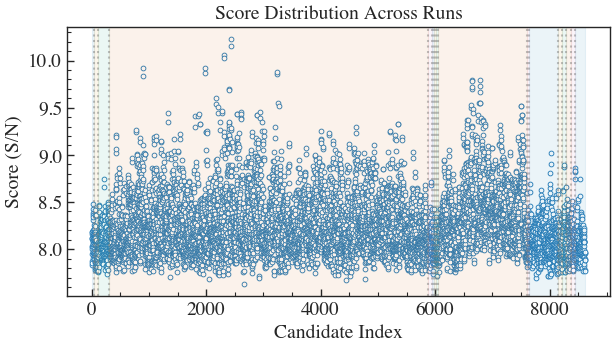

In [11]:
pgram.plot_scores(kind="scatter", run_id=None); plt.show()

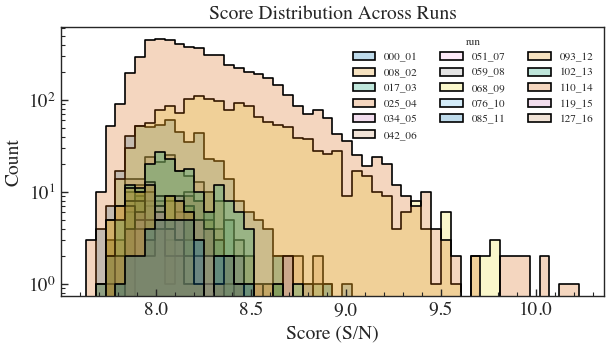

In [12]:
pgram.plot_scores(kind="hist", run_id=None); plt.show()

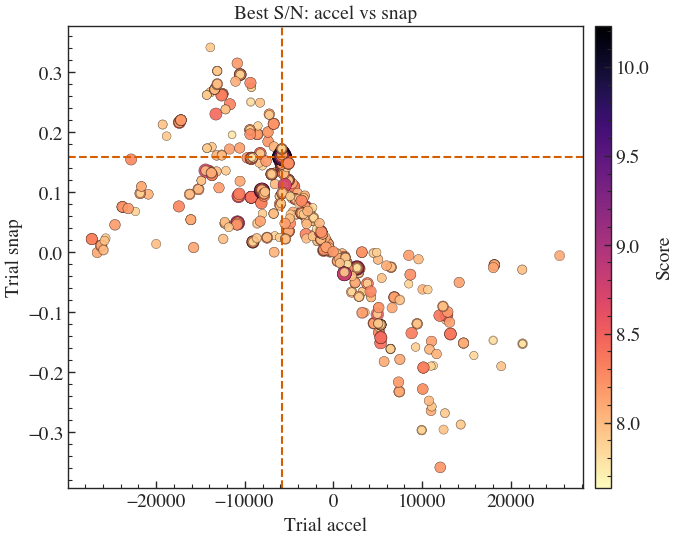

In [13]:
pgram.plot_correlation("accel", "snap", true_values={"snap": snap_true, "accel": acc_true}, run_id=None); plt.show()

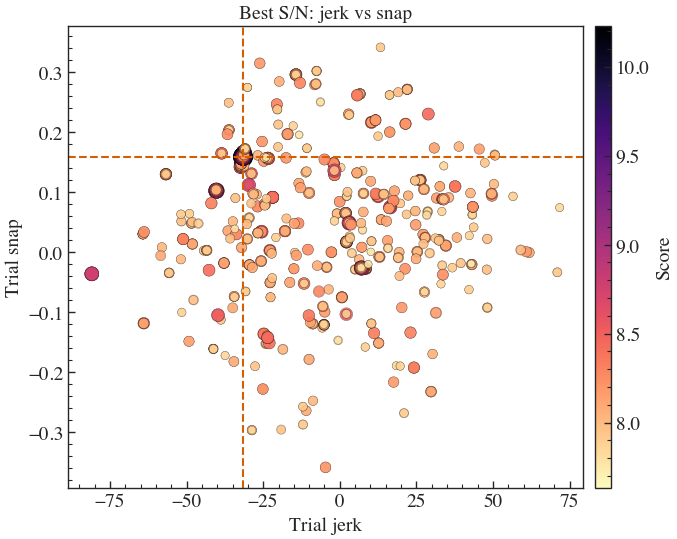

In [14]:
pgram.plot_correlation("jerk", "snap", true_values={"snap": snap_true, "jerk": jerk_true}, run_id=None); plt.show()

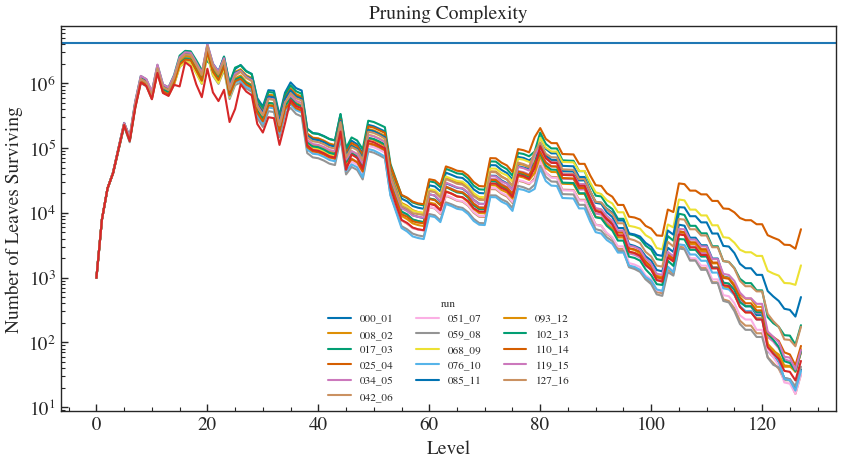

In [15]:
pstats = PruningStatsPlotter.load(result_file)
fig = pstats.plot_level_stats(run_id=None)
x = np.arange(0, len(branching_pattern) + 1)
ax_list = fig.axes
ax_list[0].plot(x, np.concatenate(([1], thresh_state.get_info("complexity"))) * dyp.nparam_vol, label="Expected", c="tab:red")
ax_list[0].axhline(2**22, label="RAM limit", c="tab:blue")
plt.show()